<a href="https://colab.research.google.com/github/Medicyp/Image-Classifier-Python/blob/master/Classify_Images_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program classifies images

In [0]:
#Load the data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [0]:
#Print the data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
# Get the shapes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [0]:
#Take a look at the first image (at index=0) in the training data set
x_train[0]

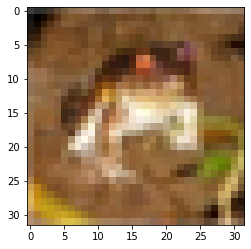

In [0]:
#Show image as picture
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [0]:
#Print the label of the image
print('The label is:', y_train[0])

The label is: [6]


In [0]:
#One-Hot Encoding: Convert the labels into a set of 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new labels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
#Print an example of the new labels
print('The one hot label is', y_train_one_hot[0])

The one hot label is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#Normalize the pixels in the images to be values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [0]:
#Build the CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Create the architecture
model=Sequential()

#Convolution layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolution layer
model.add( Conv2D(32, (5,5), activation='relu') )

#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer
model.add( Flatten() )

model.add( Dense(1000,activation='relu'))
model.add( Dense(10, activation='softmax'))




In [0]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [0]:
#Train the model
hist=model.fit(x_train,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 50s 1ms/step - loss: 1.7079 - acc: 0.3804 - val_loss: 1.4728 - val_acc: 0.4687
Epoch 2/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.3739 - acc: 0.5076 - val_loss: 1.3249 - val_acc: 0.5260
Epoch 3/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.2421 - acc: 0.5606 - val_loss: 1.2285 - val_acc: 0.5703
Epoch 4/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.1242 - acc: 0.6005 - val_loss: 1.1776 - val_acc: 0.5807
Epoch 5/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.0266 - acc: 0.6380 - val_loss: 1.0684 - val_acc: 0.6291
Epoch 6/10
35000/35000 [==============================] - 50s 1ms/step - loss: 0.9501 - acc: 0.6675 - val_loss: 1.1052 - val_acc: 0.6191
Epoch 7/10
35000/35000 [==

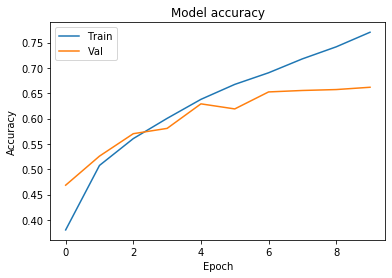

In [0]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

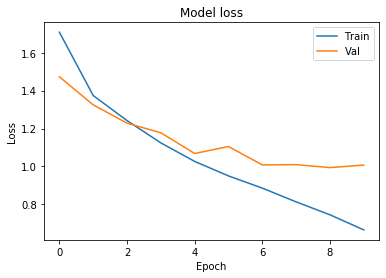

In [0]:
#Viaualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [0]:
#Load the data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('cat_4015.jpg')

Saving cat_4015.jpg to cat_4015.jpg


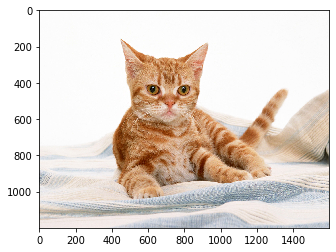

In [0]:
#Show the uploaded image
img = plt.imshow(my_image)


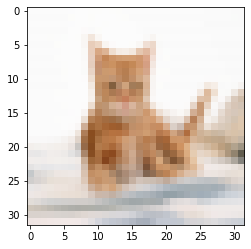

In [0]:
#Resize the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [0]:
#Get the probabilities for each class
import numpy as np
probabilities = model.predict(np.array( [my_image_resized, ]))

#Print the probabilites
probabilities

array([[4.4764574e-03, 4.7066328e-06, 4.2611819e-02, 5.9906650e-01,
        2.2125123e-03, 2.1314831e-01, 7.2244212e-02, 3.0577421e-02,
        3.4450166e-02, 1.2078398e-03]], dtype=float32)

In [0]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print('Most likely class:', number_to_class[index[9]], '--probability:', probabilities[0, index[9]])
print('Second likely class:', number_to_class[index[8]], '--probability:', probabilities[0, index[8]])
print('Third likely class:', number_to_class[index[7]], '--probability:', probabilities[0, index[7]])
print('Fourth likely class:', number_to_class[index[6]], '--probability:', probabilities[0, index[6]])
print('Fifth likely class:', number_to_class[index[5]], '--probability:', probabilities[0, index[5]])

Most likely class: cat --probability: 0.5990665
Second likely class: dog --probability: 0.21314831
Third likely class: frog --probability: 0.07224421
Fourth likely class: bird --probability: 0.04261182
Fifth likely class: ship --probability: 0.034450166


In [0]:
#Save the model
model.save('my_model.h5')

#Load the model
from keras.models import load_model
model = load_model('my_model.h5')